# Objective:
to generate data of degree 3 polynomial and fit models of degree 1, degree 3 and degree 13 polynomial and compare their performances.

# Tasks:

## Task 1: Data generation
- generate 500 samples of the target variable y using the equaton ,
y=0.5x^3-x^2+2 and add noise

- Visualize the generated data points


## Task 2: Polynomial regression (500 samples)

Fit polynomial regression models of the following degree to the generated data:(use polynomial features library from Scikit-learn)

- Linnear Regression mode(Degree - 1)
- Polynomial Regression model (Degree - 3)
- Polynomial Regression model (Degree - 13)
- Compare the estimated model co-efficients to the actual ground truth equations
- Evaluate the model performance using metrics: MSE , MAE, R^2


# Task 1 Code:

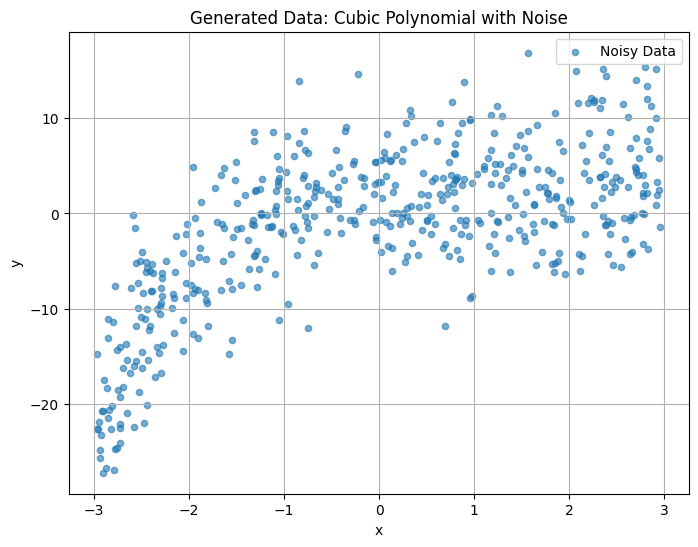

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate input data
x = np.random.uniform(-3, 3, n_samples)

# True underlying function
y_true = 0.5 * x**3 - x**2 + 2

# Add Gaussian noise
noise = np.random.normal(0, 5, n_samples)
y = y_true + noise

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=20, alpha=0.6, label="Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data: Cubic Polynomial with Noise")
plt.legend()
plt.grid(True)
plt.show()


# Task 2 Code:

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reshape X for sklearn
X = x.reshape(-1, 1)
y_target = y

# Degrees to test
degrees = [1, 3, 13]

results = []

for degree in degrees:
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X)

    # Linear regression on transformed features
    model = LinearRegression()
    model.fit(X_poly, y_target)

    # Predictions
    y_pred = model.predict(X_poly)

    # Evaluation metrics
    mse = mean_squared_error(y_target, y_pred)
    mae = mean_absolute_error(y_target, y_pred)
    r2 = r2_score(y_target, y_pred)

    results.append({
        "Degree": degree,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_
    })

    # Display coefficients
    print(f"\n🔹 Polynomial Degree {degree}")
    print("Intercept:", model.intercept_)
    for i, coef in enumerate(model.coef_):
        print(f"x^{i}: {coef:.4f}")

# Convert results to dataframe
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary")
print(results_df[["Degree", "MSE", "MAE", "R2"]])



🔹 Polynomial Degree 1
Intercept: -1.2555889536901006
x^0: 0.0000
x^1: 3.0521

🔹 Polynomial Degree 3
Intercept: 2.5318007492252113
x^0: 0.0000
x^1: 0.1944
x^2: -1.1537
x^3: 0.4978

🔹 Polynomial Degree 13
Intercept: 2.034565317619272
x^0: 0.0000
x^1: -3.5659
x^2: 0.8056
x^3: 11.4449
x^4: -1.5138
x^5: -9.8695
x^6: 0.3932
x^7: 3.9528
x^8: -0.0272
x^9: -0.7787
x^10: -0.0021
x^11: 0.0738
x^12: 0.0002
x^13: -0.0027

📊 Model Performance Summary
   Degree        MSE       MAE        R2
0       1  39.476836  5.097990  0.430638
1       3  25.005302  3.992331  0.639356
2      13  24.379374  3.912345  0.648384
